# Diamond Price Prediction
using Linear Regression

## 1. Data Colection

Dowload Data from https://www.kaggle.com/datasets/natedir/diamonds

This is a dataset that includes 9 observations about the characteristics of each unique diamond, as well as the price.

• Carat- Carat weight of the diamond \
• Cut - The cut rating of the diamond \
• Color - The color rating of the diamond \
• Clarity - The clarity rating of the diamond \
• Table - The table width of the diamond \
• Depth- The percentage of depth of the diamond \
• Price - The price (in USD) of the diamond \
• X- X dimension of the diamond \
• Y- Y dimension of the diamond \
• Z- Z dimension of the diamond 

In [91]:
import pandas as pd
import numpy as np

# reading data 
# data_path = '/Users/minhvuongdo/Work/Diamond_price_prediction/diamonds.csv'
# diamond_df = pd.read_csv(data_path)
diamond_df = pd.read_csv('diamonds.csv')

## 2. Explore data

In [92]:
diamond_df.describe() # xem mô tả chung về data (số lượng dòng dữ liệu, feartures, mean, min, max, std)

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [95]:
# xem 5 dòng đầu tiên của data
diamond_df.head(5) # xác định cấu trúc & một số đặc điểm cơ bản của data. Xác định những feature nào có thể sử dụng.


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
# kiểm tra kích thước dữ liệu
diamond_df.shape

(53940, 11)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

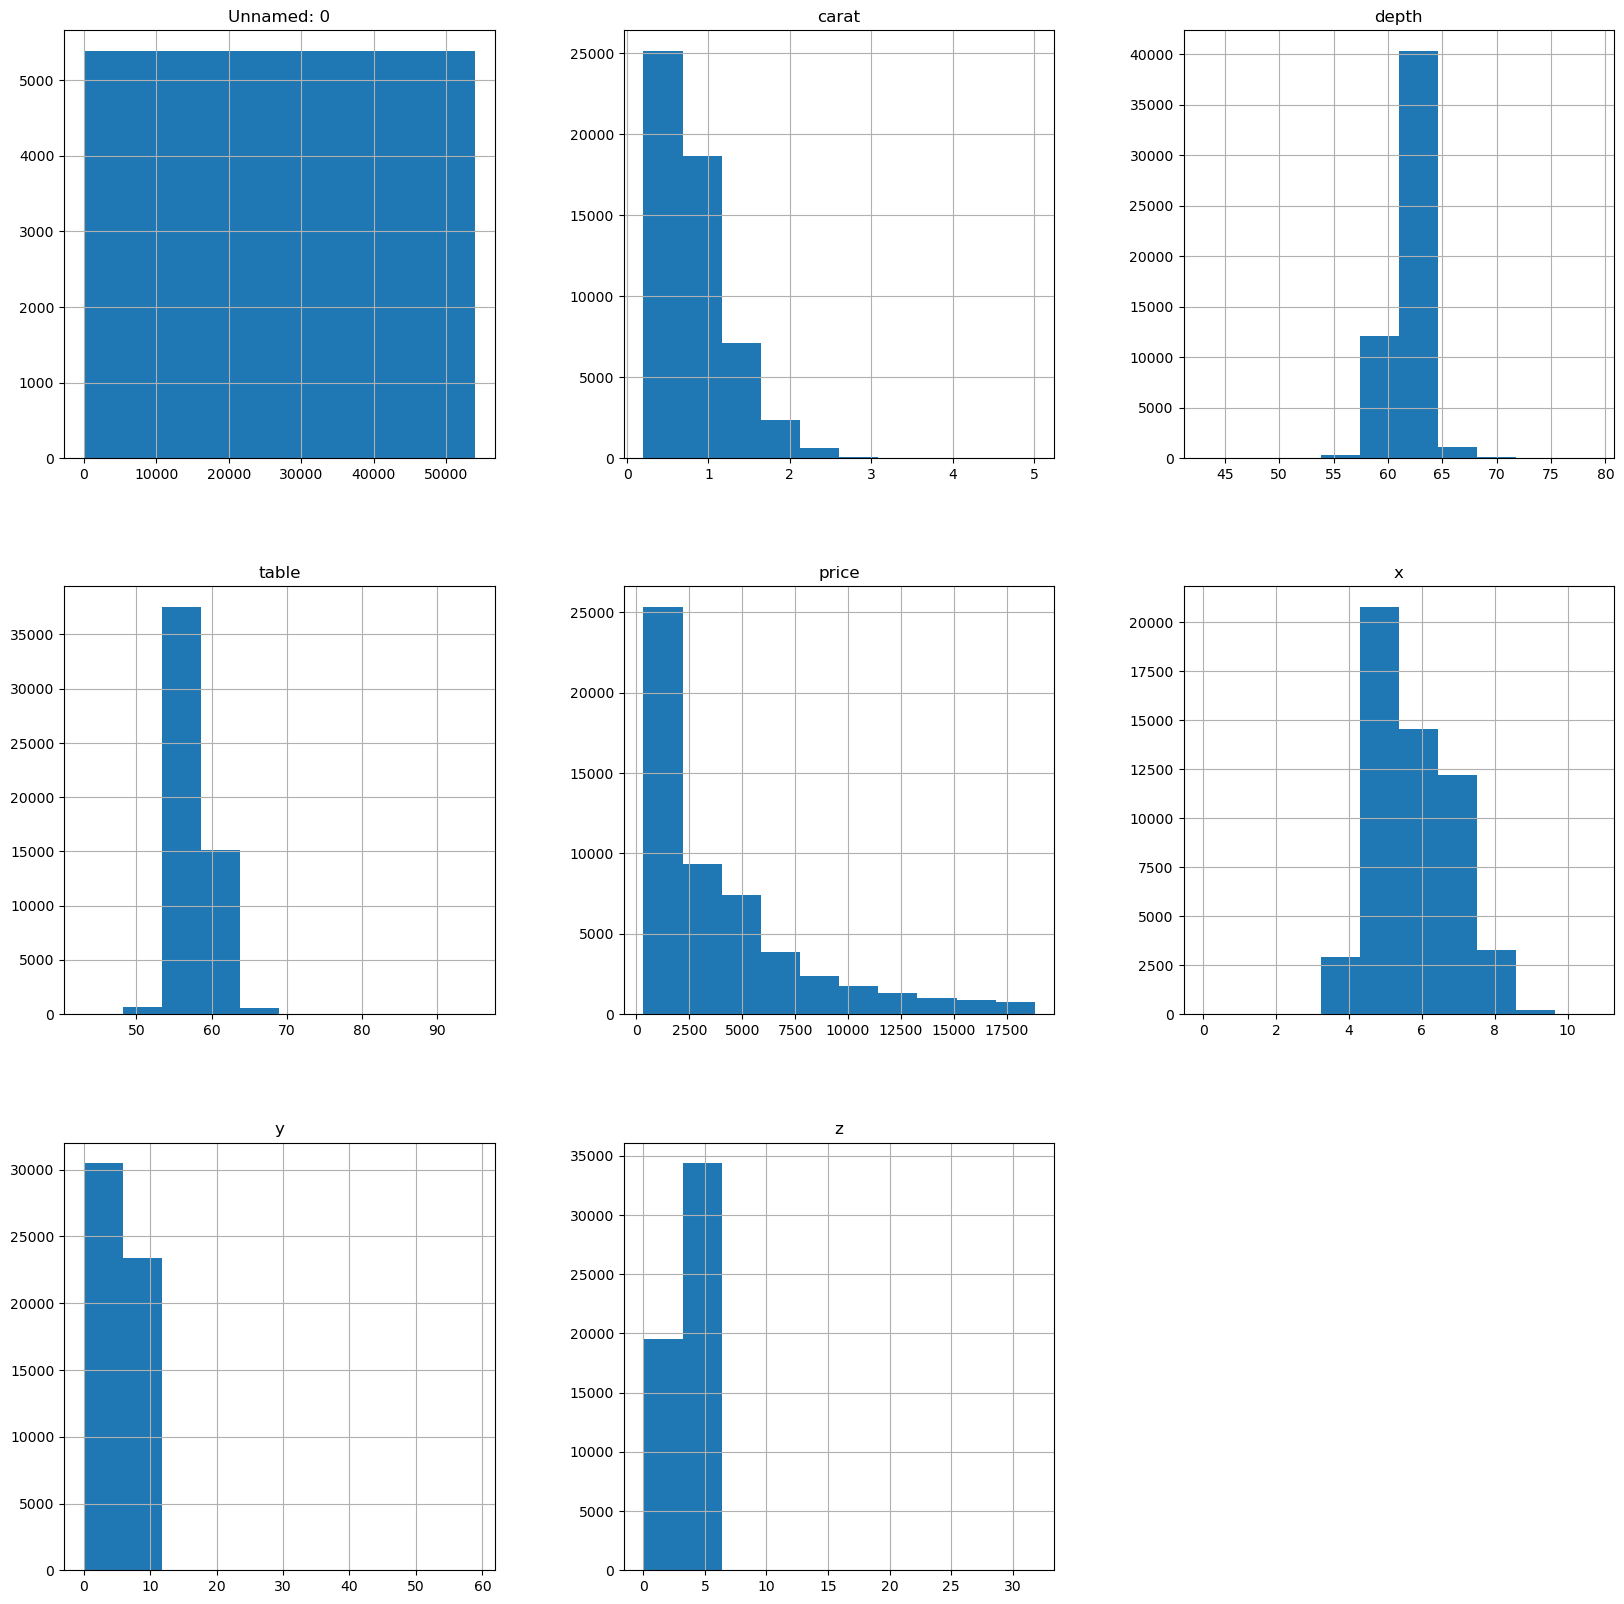

In [54]:
# sử dụng matplotlib để tạo histogram map của dataframe

# allows the output of plotting commands to be displayed inline within the notebook
%matplotlib inline 


import matplotlib.pyplot as plt

diamond_df.hist(figsize = (20, 20)) # dataframe.hist(): create a histogram of the values in dataframe 

* using the scatter_matrix() function from the Pandas plotting library to create a scatter matrix plot of a Pandas DataFrame called diamond_df.
* A scatter matrix is a grid of scatterplots that shows the **pairwise relationships** between multiple variables in a dataset. In this case, diamond_df is a DataFrame that contains information about diamonds, and the scatter matrix will show the pairwise relationships between different variables in the dataset.

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='carat', ylabel='Unnamed: 0'>,
        <Axes: xlabel='depth', ylabel='Unnamed: 0'>,
        <Axes: xlabel='table', ylabel='Unnamed: 0'>,
        <Axes: xlabel='price', ylabel='Unnamed: 0'>,
        <Axes: xlabel='x', ylabel='Unnamed: 0'>,
        <Axes: xlabel='y', ylabel='Unnamed: 0'>,
        <Axes: xlabel='z', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='carat'>,
        <Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='depth', ylabel='carat'>,
        <Axes: xlabel='table', ylabel='carat'>,
        <Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='depth'>,
        <Axes: xlabel='carat', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='table', ylabel='depth'>,
       

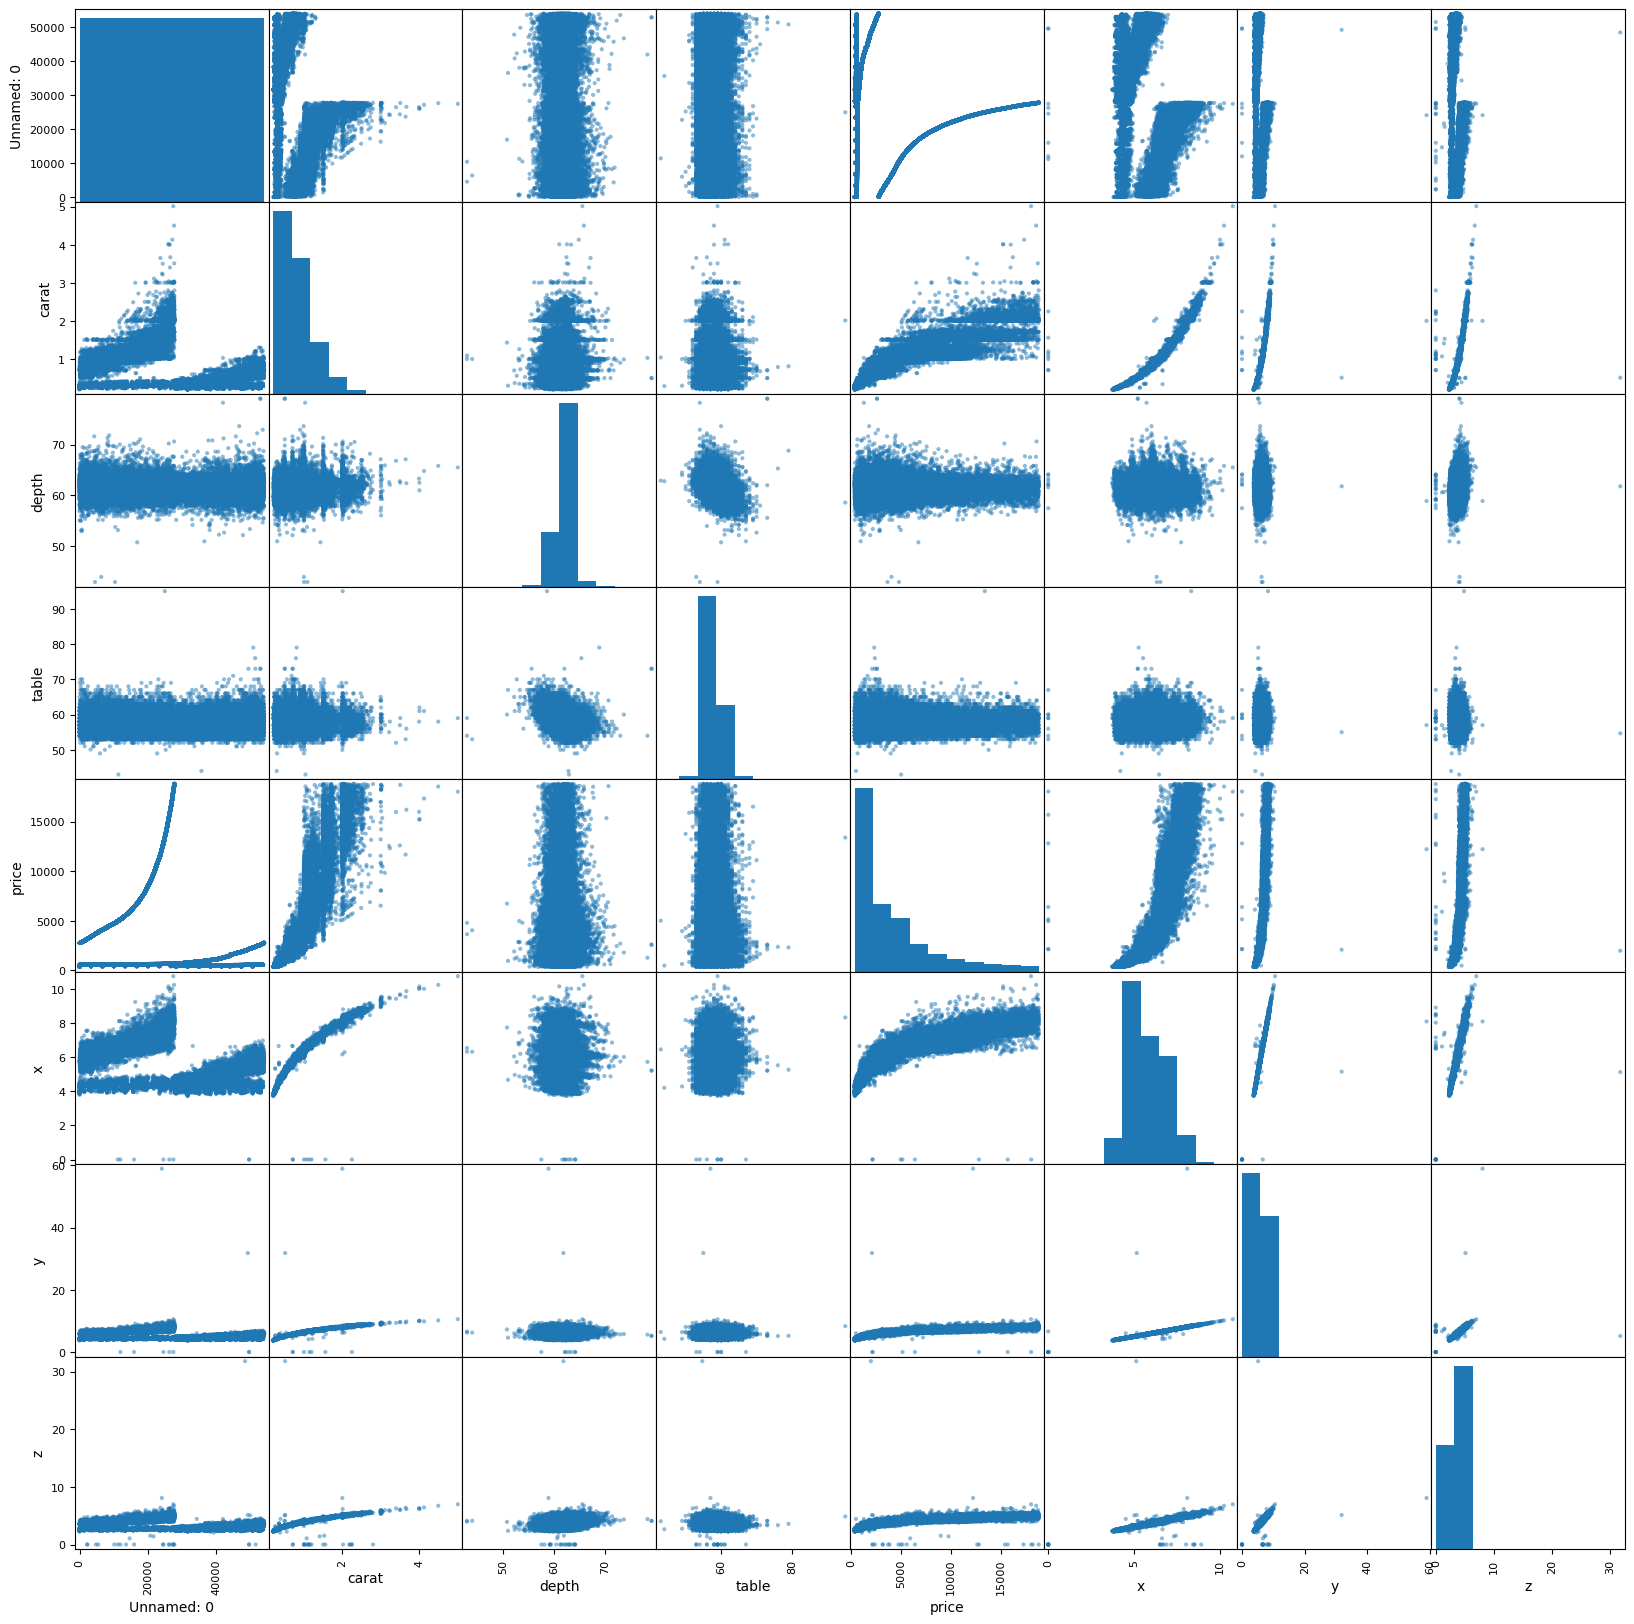

In [96]:
# trực quan hoá mối liên hệ theo từng cặp giữa các biến trong dataset
from pandas.plotting import scatter_matrix
scatter_matrix(diamond_df, figsize=(20, 20))

## 3. Data preparation

In [97]:
# Xoá các dữ liệu không cần thiết
diamond_df = diamond_df.drop(['Unnamed: 0'], axis=1) # drop() method return new dataframe with specified column removed (axis=1 remove column, axis=0 remove row)
diamond_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Xử lý các cột có thuộc tính văn bản, hạng mục (color, clarity, cut)

In [101]:
# 'color' column
# Kiểm tra giá trị cần mapping

color = diamond_df.loc[:, 'color'] # lấy ra giá trị của cả cột 'color'

diamond_df.groupby('color').size() # tính toán kích thước trên mỗi nhóm

# --> cột color có các biến (D, E, F, G, H, I, J) cần được mapping sang kiểu số
# note: hãy thử kết hợp hàm groupby() với các function khác, vd: groupby().count(), .describe(), .std()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

In [100]:
# 'cut' column
cut = diamond_df.loc[:, 'cut']
diamond_df.groupby('cut').count() 

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [103]:
# we need to create a dictionary to maps the original values in the 'color' to new values

# create a mapping of color values to integers
color_mapping = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4 , 'I': 5, 'J': 6}

# map the color values to integers in the 'color' column of the DataFrame diamond_df
diamond_df.color = diamond_df.color.map(color_mapping)

# check updated DataFrame
print(diamond_df.head(5))

   carat      cut  color clarity  depth  table  price     x     y     z
0   0.23    Ideal    NaN     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium    NaN     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good    NaN     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium    NaN     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good    NaN     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
# thực hiện tương tự cho 'cut' & 'clarity' column
# create a mapping of 'cut' values

cut_mapping = {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Very Good': 3, 'Premium':4}
